<p align="center">
  <span style="color:Navy; font-size:200%; font-weight:bold; vertical-align:middle;">
    Temas Selectos: Python para Ciencias de la Tierra
  </span>
  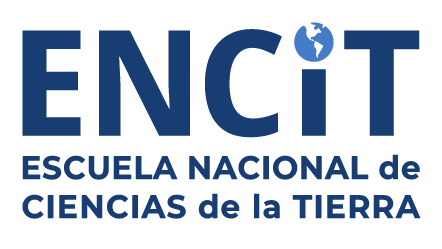
</p>
<p align="center" style="line-height:1.2;">
  <span style="color:RoyalBlue; font-size:160%;">Tema 4: Introducción al Aprendizaje Automático (Machine Learning) </span><br/>
  <span style="color:DodgerBlue; font-size:140%;"> Preprocesamiento de datos: Análisis multivariado </span><br/>
  <span style="font-size:100%;color:forestgreen"> Escuela Nacional de Ciencias de la Tierra  |  Semestre 2026-I</span>
</p>

---


# **<font color="ForestGreen">  Análisis multivariado </font>**

El análisis multivariado es fundamental para el machine learning porque
permite analizar la relación entre múltiples variables para encontrar patrones, hacer predicciones y clasificar datos. Se usa para entender la complejidad de datos que no se podrían captar con un análisis univariado o bivariado, aplicando técnicas como la regresión múltiple y el análisis de componentes principales (PCA) para predecir tendencias, segmentar grupos y mejorar la toma de decisiones en diversas áreas.

## **<font color="SeaGreen"> Elección de variables predictoras </font>**

La elección de variables predictoras (también conocida como selección de características o feature selection) es un proceso crucial en machine learning para identificar el subconjunto de variables más relevantes para un modelo. El objetivo es mejorar la precisión, reducir la complejidad y acelerar el entrenamiento del modelo

### Importancia de la Selección de Variables

* **Mejora del rendimiento:** Eliminar características irrelevantes o redundantes puede llevar a mejores predicciones y mitigar el sobreajuste (overfitting).
* **Reducción de la complejidad:** Un modelo con menos variables es más simple, fácil de interpretar y requiere menos recursos computacionales para entrenar y ejecutar.
* **Optimización de recursos:** Se reduce el costo computacional y el tiempo necesario para el entrenamiento.


## **<font color="SeaGreen"> Pronostico estacional de sequia </font>**

A lo largo de esta unidad estaremos construyendo modelos de machine learning para hacer un pronóstico estacional de sequía para un punto en el noroeste de México (lat = 29.725, lon = -109.725).


### Paso 0:   Plantear el problema

* ¿Cuál es el fenómeno físico que quiero estudiar?
    **El comportamiento de la sequía** 
* ¿Cuál es la variable dependiente?
   El SPI (Standardized Precipitation Index) —o Índice Estandarizado de Precipitación— es un indicador estadístico usado para medir las anomalías de precipitación (lluvia) en una región y período determinados. Su objetivo principal es cuantificar las condiciones de sequía o exceso de lluvia de manera estandarizada y comparable en el tiempo y el espacio.

    **La variable dependiente sera el SPI de 3 meses (que corresponde a una sequia meteorologica)**

* ¿Es una regresión o una clasificación? 



### Paso 1:  Datos 

* Obtener información diversa (¿Necesitamos muchos datos?).

    ¿Existen datos confiables que pueda usar?
    ¿Los datos tienen variedad?

* Remover información falsa, buscar/llenar valores faltantes… 

    Si no lleno los vacíos, el molodelo los aprenderá también.

* Proponer variables “predictoras” 

* **Hacer un análisis estadístico de las variables propuestas.**

* Definir las variables de entrada.


> Las variables que estan relacionadas con las sequías son aquellas que afectan al ciclo hidrológico y que pueden causar un estrés hídrico. Una alteración en estas variables detonan reacciones en cadena conocidas como procesos de retroalimentación.

Las variables que se proponen (inicialmente) para hacer los modelos, y sus procedencias, son las siguientes:


|Variable                                     | Abreviacion  | Base de datos  |
|---------------------------------------------|--------------|----------------|
|Precipitación acumulada                      | pcp          | CHIRPS         |
|Radiación de onda larga saliente             | OLR          | NCEP-NCAR      |
|SSTs en la región de El Niño 3.4             | SST          | NOAA           |
|Volumen de agua en la primera capa del suelo | swvl1        | ERA-5 Land     |
|Temperatura en la superficie del suelo       | skt          | ERA-5 Land     |
|Altura geopotencial en 600mb                  | hgt          | NCEP-NCAR      |




<div class="alert alert-success">
    <b>Paso 1 : <b> La misión en esta clase e terminar el análisis multivariado, y elegiremos los predictores perfectos para nuestros modelos de machine learning. 
</div>


### **<font color="SeaGreen"> Importar la base de datos </font>**

* Crea un DataFrame con los datos de `sequias_datos.csv` y muestra las primeras filas.

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

from sklearn.neighbors import LocalOutlierFactor
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler 

from sklearn.decomposition import PCA

In [29]:
# carga de archivo csv
df=pd.read_csv('sequias_datos.csv')
df.head()

,Year,sst_mean_SON,sst_mean_OND,sst_mean_NDE,sst_mean_DJF,sst_mean_Jan,spi,pcp_SON,pcp_OND,pcp_NDE,...,skt_SON,skt_OND,skt_NDE,skt_DJF,skt_Jan,swvl1_SON,swvl1_OND,swvl1_NDE,swvl1_DJF,swvl1_Jan
0,1981,26.295703,26.241972,26.281063,26.407555,26.583525,-0.672088,90.611435,34.211945,18.819138,...,294.19766,291.48044,289.14413,289.32132,288.82553,0.296509,0.238573,0.225010,0.206602,0.060151
1,1982,28.341490,28.636714,28.704208,28.716984,28.718637,0.551539,129.213300,89.716790,62.293777,...,293.33524,289.64480,286.61465,285.90000,284.20290,0.308189,0.322741,0.387607,0.378843,0.202828
2,1983,25.754122,25.448048,25.405423,25.782886,25.488600,0.256219,80.509700,31.199910,47.168045,...,292.82350,290.70163,287.93850,286.11597,284.93808,0.401436,0.244475,0.306793,0.449660,0.179581
3,1984,25.860297,25.449453,25.195422,25.309907,25.162136,0.141934,61.921604,38.681725,32.634262,...,292.55923,291.47500,288.13890,287.97880,284.60580,0.376130,0.234884,0.267290,0.293302,0.136410
4,1985,26.008695,26.037523,25.977030,25.871038,25.767262,-0.855751,51.623270,48.386490,31.393246,...,294.60364,291.35147,289.12784,288.39290,287.57596,0.251178,0.252185,0.201228,0.210402,0.060556


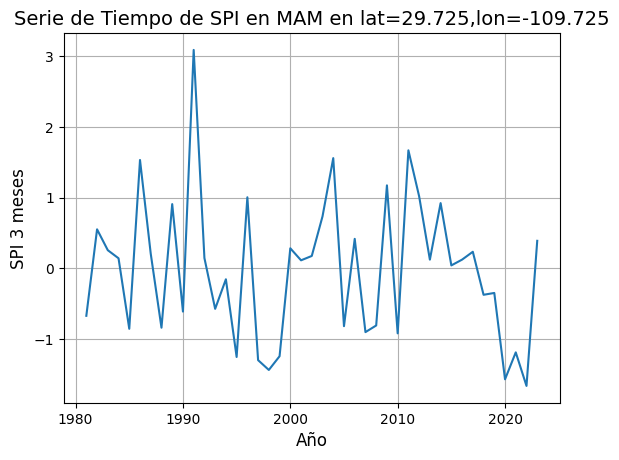

In [30]:
plt.figure()
sns.lineplot(x='Year',y='spi', data=df, markers='o')
plt.title('Serie de Tiempo de SPI en MAM en lat=29.725,lon=-109.725', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('SPI 3 meses', fontsize=12)
plt.grid(True)
plt.show()

In [31]:
VariablesNumAnalis = [ 'spi', 'sst_mean_DJF', 'pcp_DJF', 'hgt_DJF', 'olr_DJF', 'skt_DJF', 'swvl1_DJF']

df_DEF = df[VariablesNumAnalis]
df_DEF.head()

,spi,sst_mean_DJF,pcp_DJF,hgt_DJF,olr_DJF,skt_DJF,swvl1_DJF
0,-0.672088,26.407555,23.249588,4391.535,256.32935,289.32132,0.206602
1,0.551539,28.716984,56.149323,4352.721,248.58508,285.90000,0.378843
2,0.256219,25.782886,40.461422,4379.268,247.67094,286.11597,0.449660
3,0.141934,25.309907,39.615967,4389.627,245.90265,287.97880,0.293302
4,-0.855751,25.871038,35.157770,4390.934,255.53215,288.39290,0.210402


### **<font color="SeaGreen"> Elección de predictores por medio de componentes principales  </font>**

#### **Análisis de Componentes Principales**

El Análisis de Componentes Principales (ACP o PCA por sus siglas en inglés) es una
técnica de extracción de características y reducción de dimensionalidad, no un método directo de selección de las variables originales (predictores); aunque también puede usarse para ver la importancia de algunas variables sobre otras. El PCA transforma las variables originales correlacionadas en un nuevo conjunto de variables no correlacionadas llamadas componentes principales.

Proceso para usar componentes principales como predictores: 

* **Estandarización de datos:** Se deben estandarizar las variables originales para que tengan media cero y desviación estándar uno, ya que el ACP se basa en la varianza y es sensible a la escala de las variables.

* **Cálculo de componentes:** Se calculan los componentes principales. Cada componente captura la máxima varianza remanente posible de los datos y son ortogonales (no correlacionados) entre sí.


* **Selección del número de componentes:** Se elige un número menor de componentes principales que retengan la mayor parte de la información (varianza) de las variables originales. Los métodos comunes para esto incluyen:


* **Umbral de varianza explicada:** Seleccionar el número de componentes que explican un porcentaje acumulado de varianza (comúnmente 80%, 90% o más).


Al final podremos elegir cuáles son las variables que usaremos para crear los modelos, o tendremos la opción de entrenar los modelos con las componentes principales como variables predictoras. 

In [32]:
# Creamos una copida del DataFrame Original
df_DEF_copy = df_DEF.copy()

# Paso 1: Estandarizar los datos.
scaler = StandardScaler()
df_DEF_scaled = scaler.fit_transform(df_DEF_copy)
df_DEF_scaled_df = pd.DataFrame(df_DEF_scaled, columns=VariablesNumAnalis)

In [33]:
# Paso 2: Obtenemos las componentes principales. 
# Primero considerando el SPI para elegir variables predictoras.
# Luego sin el SPI para evaluar el uso de las componentes principales como predictores.

pca = PCA()
X_pca_con_spi =  pca.fit_transform(df_DEF_scaled_df)

Text(50.722222222222214, 0.5, 'Componentes Principales')

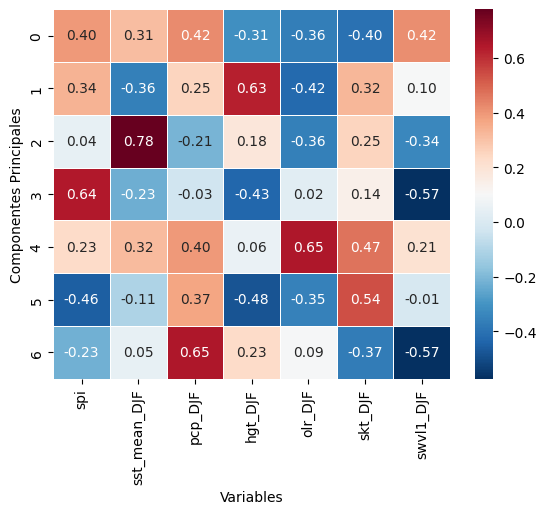

In [34]:
# Paso 3: Obtenemos los pesos de las componentes principales.

pesos_con_spi = pca.components_

#Creamos un DataFrame para almacenar los pesos
pesos_con_spi_df = pd.DataFrame(pesos_con_spi, columns=VariablesNumAnalis)

#Graficamos los pesos de las componentes principales. 
plt.figure()
ax = sns.heatmap(pesos_con_spi_df, annot=True, cmap='RdBu_r', fmt = ".2f", linewidths=0.5)
cbar = ax.collections[0].colorbar
plt.xlabel('Variables')
plt.ylabel('Componentes Principales')

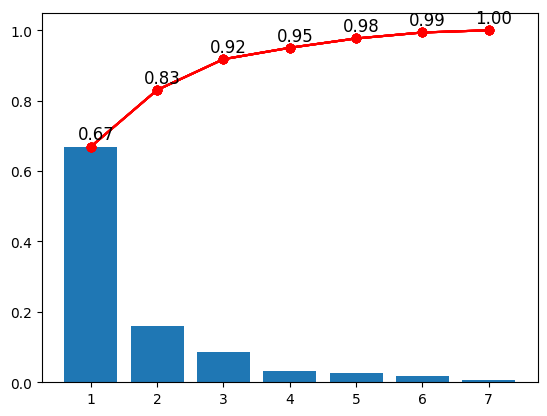

In [18]:
# Paso 4: Obtenemos la varianza explicada por cada componente principal. 

# Primero obtenemos la varianza de cada componente principal
varianza_pca_con_spi = pca.explained_variance_ratio_
suma_varianza_con_spi = np.cumsum(varianza_pca_con_spi)

# Graficamos
fig, ax = plt.subplots()
componentes = range(1, len(varianza_pca_con_spi)+1)
ax.bar(componentes, varianza_pca_con_spi)

for i,v in enumerate(suma_varianza_con_spi):
    ax.annotate(f'{v:.2f}', xy=(i+1, suma_varianza_con_spi[i]), xytext=(i+0.8, suma_varianza_con_spi[i]+0.02), textcoords='data', color='black', fontsize = 12)
    ax.plot(componentes, suma_varianza_con_spi, marker='o', color='red', label='Suma acumulada de varianza')

Text(50.722222222222214, 0.5, 'Componentes Principales')

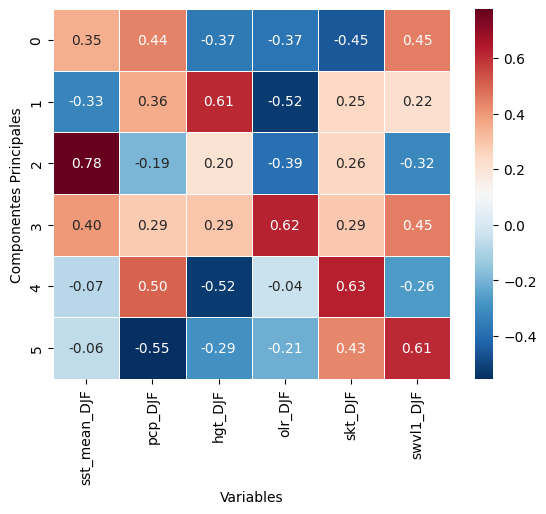

In [25]:
# Ahora obtenemos las componentes principales sin el SPI

VariablesNumAnalis_pca = ['sst_mean_DJF','pcp_DJF','hgt_DJF','olr_DJF','skt_DJF','swvl1_DJF']
# Creamos una copida del DataFrame Original
df_sin_spi = df_DEF_copy[VariablesNumAnalis_pca].copy()

# Paso 1: Estandarizar los datos.
df_sin_spi_scaled = scaler.fit_transform(df_sin_spi)
df_sin_spi_scaled_df = pd.DataFrame(df_sin_spi_scaled, columns=VariablesNumAnalis_pca)

# Paso 2: obtenemos las componentes principales.
X_pca_sin_spi =  pca.fit_transform(df_sin_spi_scaled_df)

# Paso 3: Obtenemos los pesos de las componentes principales.
pesos_sin_spi = pca.components_

#Creamos un DataFrame para almacenar los pesos
pesos_sin_spi_df = pd.DataFrame(pesos_sin_spi, columns=VariablesNumAnalis_pca)

#Graficamos los pesos de las componentes principales. 
plt.figure()
ax = sns.heatmap(pesos_sin_spi_df, annot=True, cmap='RdBu_r', fmt = ".2f", linewidths=0.5,)
cbar = ax.collections[0].colorbar
plt.xlabel('Variables')
plt.ylabel('Componentes Principales')

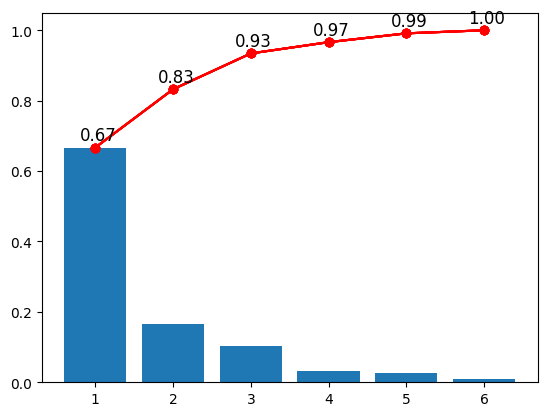

In [26]:
# Paso 4: Obtenemos la varianza explicada por cada componente principal. 

# Primero obtenemos la varianza de cada componente principal
varianza_pca_sin_spi = pca.explained_variance_ratio_
suma_varianza_sin_spi = np.cumsum(varianza_pca_sin_spi)

# Graficamos
fig, ax = plt.subplots()
componentes = range(1, len(varianza_pca_sin_spi)+1)
ax.bar(componentes, varianza_pca_sin_spi)

for i,v in enumerate(suma_varianza_sin_spi):
    ax.annotate(f'{v:.2f}', xy=(i+1, suma_varianza_sin_spi[i]), xytext=(i+0.8, suma_varianza_sin_spi[i]+0.02), textcoords='data', color='black', fontsize = 12)
    ax.plot(componentes, suma_varianza_sin_spi, marker='o', color='red', label='Suma acumulada de varianza')

---
<a name='ej-1'></a>
### **<font color="DodgerBlue"> Ejercicio 1 </font>**

<font color="DarkBlue"> Obten las componentes principales, los pesos de las variables predictoras y la varianza explicada de los datos ahora para los predictores de NDE y OND.
### **<font color="DodgerBlue"> Ejercicio 2 </font>**
    
<font color="DarkBlue"> Obten las componentes principales, los pesos de las variables predictoras y la varianza explicada de los datos de calidad de aire sin valores atípicos. 

---